# Module 12 - Statistical Distributions - the Shape of Data

**_Author: Carleton Smith, William Peterson, Greg Godreau, Mona Khalil_**

**_Revised: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 85 points**



## Assignment Overview

In this assignment, you will work with different  distributions that are essential for any data scientist, including the normal distribution, bernoulli distribution, binomial distribution, poisson distribution, geometric distribution, and exponential distribution. You'll become familiar with the differences between the use and parameterization of the various distributions as well as learning how to plot, interact with, and interpret the distributions using Python. Throughout this assignment, we will be working with key pieces of code in Python, focusing on the `numpy`, `pandas`, `matplotlib` and `scipy` libraries commonly used by data scientists in their workflow.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Define and differentiate between various distribution models including the normal distribution, bernoulli distribution, binomial distribution, poisson distribution, geometric distribution, and exponential distribution.  
- Apply distribution models to sample data, in this case, the `office_supplies` dataset.



## Index: 

#### Module 12: Statistical Distributions - the Shape of Data

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)
- [Question 14](#q14)


## Module 12: Statistical Distributions - the Shape of Data


In this assignment, we will be working with the `office_supplies` dataset, which includes data from 46,000 sales of office supplies from a small company. We'll be using a subset of the data made up of three columns. 

Let's import the necessary libraries and load this data set using the pandas `pd.read_csv()` function. Finally, we will explore the dataset using `df.head()`.

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set
office = pd.read_csv('./data/office_supplies.csv')

# Examine the first 5 rows
office.head()

,sales,transactions,neg
0,107.16,20,1
1,110.66,2,1
2,4697.62,12,1
3,103.08,9,1
4,-566.50,1,-1


Observe that the column `neg`  has 2 values, 1 and -1, indicating whether a record in the data set is negative sales (1 if negative sales/return of an item).

Next, we use the attribute `.describe()` to obtain a summary of the statistical details about our dataframe.

In [2]:
office.describe()

,sales,transactions,neg
count,46407.000000,46407.000000,46407.000000
mean,999.040725,13.591075,0.998319
std,1186.011301,7.451356,0.057955
min,-919.830000,1.000000,-1.000000
25%,280.590000,7.000000,1.000000
50%,446.670000,15.000000,1.000000
75%,1236.900000,19.000000,1.000000
max,11069.760000,66.000000,1.000000


<a id = "normal"></a>
### Normal Distribution

The normal distribution, also known as the *Gaussian distribution*, is a probability distribution that is symmetric around the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, the normal distribution will appear as a *bell curve*.

[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

Which of the following parameters describe a normal distribution?
- a) mean -- $\mu$
- b) Standard Deviation -- $\sigma$
- c) probability -- $p$
- d) mean / Variance -- $\lambda$
- e) Variance -- $\sigma^2$

Create a list of all correct answers, i.e., ['a', 'b'], and assign it to `ans1`.

In [3]:
### GRADED

### YOUR SOLUTION HERE
ans1 = ['a','b']

###
### YOUR CODE HERE
###


In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we generate a distribution of sample means drawn from the `office['sales']` data set. The Central Limit Theorem states that, aside from a few exceptions, a distribution of means from multiple samples in a population follows a normal distribution.

Run the following code cell, which does the following task 10,000 times inside a `for` loop:
1. Randomly choose 100 observations from the `sales` column
2. Take the mean of each sample of 100 observations
3. Append the mean to a Python list called `sample_means`, which is initialized as an empty list before the loop.

After running this loop, we print the first 5 means in the list to get a sense of what it looks like.

In [6]:
%%time

# Create a list to collect sample means
sample_means = []

# Generate 100 
for i in range(10000):
    
    # Draw 100 random observations from the sales column
    sample = np.random.choice(office['sales'], size = 100, replace = True)
    
    # Add the mean of each sample to the list
    sample_means.append(np.mean(sample))

    
# Print first five sample means
print("Example sample means:", sample_means[:5], "\n")

Example sample means: [1264.5592, 1064.0846999999999, 929.4177999999999, 913.7121, 1208.6981999999998] 

CPU times: user 988 ms, sys: 0 ns, total: 988 ms
Wall time: 986 ms


Now that we have our list of sample means, we are going to create two subplots in `matplotlib` -- one plotting the distribution of sample means, and one plotting a random normal sample of 10,000 values using `np.random.normal()`. 

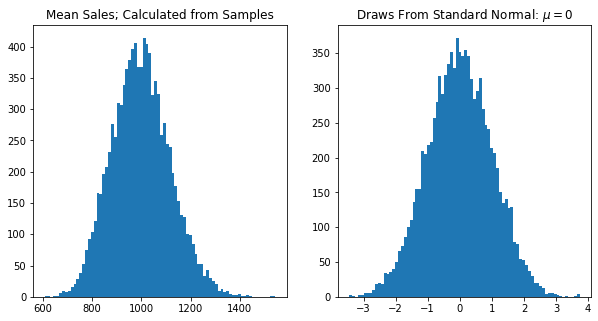

In [7]:
# Set up a subplot with 2 axes
_, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

# Create a histogram for the first subplot of sample_means
ax1.hist(sample_means, bins = 80)
ax1.set_title("Mean Sales; Calculated from Samples");

# Create the second histogram of random normal data
ax2.hist(np.random.normal(size = 10000), bins = 80)
ax2.set_title("Draws From Standard Normal: $\mu = 0$");

The two visualizations are fairly similar, and are both clear examples of a _normal distribution_. In a normal distribution, the majority of data is centered around the mean with a small number of data points (outliers) present at the edges (tails) of the distribution. 

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Refer to the two figures above. The mean $\mu$ of the standard normal distribution on the right is 0, and the standard deviation is 1. The distribution of sample means on the left is also approximately normal. Estimate the value of the mean of the distribution on the left to the nearest 100 and assign it to `ans2` below.

**Hint:** Use the functions `.mean()` and `round` and recall that the distribution on the left was generated from `office['sales']`.

In [16]:
int(round(office['sales'].mean(),-2))

1000

In [17]:
### GRADED

### YOUR SOLUTION HERE
ans2 = int(round(office['sales'].mean(),-2))

###
### YOUR CODE HERE
###


In [18]:
ans2

1000

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Standard deviation

The **standard deviation** measures the average distance above or below the mean. It's an indicator of how spread out a data set is in relation to the mean.

Let's take a look at the standard deviation of the `sample_means` data set using the `np.std()` function from the `numpy` package.

In [19]:
# Print the sample_means standard deviation
print("Standard deviation = ", np.std(sample_means))

Standard deviation =  118.67857438614605


Assume now that we have the following knowledge about the entire population (all of the `office` sales data):

- The data is normally distributed
- The population mean is \$1,000 per sale
- The population standard deviation is \$120 per sale
- The population covariance is 0 ($\rho = 0$)

We'll use this knowledge to compare summary values of another normal distribution, a vending machine company's sales with:
- A normally distributed population
- A population mean of \$950
- A population standard deviation of \$20

**Note:** From now on, we will use the letter `O` to denote the `office` dataset, and the letter `V` to represent the vending machine company dataset.

### Linear Combination of Normal Distributions

Next, we are going to look at methods of interacting with and comparing values from the two distributions. 

Let's consider two potential scenarios:  

- Adding the mean sales from both companies
- Generating a weight mean, using the combination of 0.6 of the sales from the office supply company and 0.4 of the sales from the vending company. These figures represent the proportions of sale records from each distribution (60% of all sales were from the office company, 40% were from the vending company).

#### Expected Value
The term _expected value_ $E[X]$ refers to the actual or inferred value of the population $X$. (In your work as a data scientist, you will sometimes have access to this information, but often times you may need to estimate it.) 

The `office` data set has an expected population mean of 1000, and the `vending` company has an expected mean of 950. Using mathematical notation, the expected value for these two distributions can be represented as follows:  

$E[O] = 1000$  
$E[V] = 950$  

If $a \text{ and } b$ are constants, and $X \text{ and } Y$ are normally distributed, then 

$$E[aX +bY] = a*E[X] + b*E[Y]$$ 

Thus, we can add together the means for a total mean score:  

$E[O + V] = 1*E[O] + 1*E[V] = 1,000 + 950 = 1,950$  

Or, we can calculate a _weighted_ mean, adjusting for the proportions represented in each of the `office` and `vending` data sets.

$E[.6O+.4V] = .6 E[O] + .4 E[V] = .6*1,000 + .4 * 950 = 980$  

#### Variance
 The **variance**, the measure of spread in a data set, is defined as the standard deviation squared ($\sigma^2$). 
 Because the Standard Deviation ($\sigma$) of the office supply sales and the vending company are 120 and 20, respectively,
the variance will be 14,400 for the office supply sales and will be 400 for the vending company.  

Using mathematical notation, we can represent the variance as follows:  
$Var[O] = 14400$  
$Var[V] = 400$

If $a \text{ and } b$ are constants, and $X \text{ and } Y$ are normally distributed, we know: 

$$Var[aX+bY] = a^2Var[X] + b^2Var[Y] + 2abCov[X,Y]$$

Remember, $Cov[X,Y] \text{ is } \rho$. For us, as stated above, $\rho$ is 0.  

We can calculate the variance between the two data sets as follows:

$Var[O+V] = 1^2Var[O] + 1^2Var[V] + 0 = 14,400 + 400 = 14,800$  

We can also calculate a weighed variance, reflecting the proportions in the actual population:

$Var[.6O+.4V] = .6^2Var[O] + .4^2Var[V] + 0 = .36*14,400 + .16*400 = 5,248$  



[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*

Calculate the **expected value** of twice the mean sales of the office company plus half of the mean sales of the vending company. Assign the result as a float to `ans3`.

$$E[aX + bY] = a*E[X] + b*E[Y]$$ 
$$E[2X + 0.5Y] = 2*E[X] + 0.5*E[Y]$$ 

In [20]:
ans3 = 2 * 1000 + 0.5 * 950

In [26]:
### GRADED
EO = 1000
EV = 950

### YOUR SOLUTION HERE
ans3 = 2 * EO + 0.5 * EV

###
### YOUR CODE HERE
###


In [27]:
ans3

2475.0

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*5 points*

Calculate the **variance** of twice the mean sales of the company, plus half of the mean sales of the vending company.
Assign your answer as a float to `ans4`.

$$Var[aX+bY] = a^2Var[X] + b^2Var[Y] + 2abCov[X,Y]$$
$$Var[2X+0.5Y] = 2^2Var[X] + 0.5^2Var[Y] + 2ab*0[X,Y]$$

In [29]:
VarO = 14400
VarV = 400

(2**2 * VarO) + (0.5 ** 2 * VarV)

57700.0

In [25]:
### GRADED
VarO = 14400
VarV = 400

### YOUR SOLUTION HERE
ans4 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "bernoulli"></a>
### Bernoulli Distribution

We just saw that continuous data can be plotted in a histogram, and often fits a _normal distribution_ which has several key characteristics. The *Bernoulli Distribution* shows the probabilities of a binary variable (a data set with **two** possible outcomes in a **single "trial"**). A common example is flipping a coin and recording the result (heads = 1, tails = 0). If you flip a coin 100 times and get 60% heads, and 40% tails, your result is as follows:

    1. Heads   -> 0.6
    2. Tails   -> 0.4
    
In another example, you can group continuous data into binary indicators that represent an outcome. For example, you can group positive sale values (sales) and negative sale values (returns) as follows:

    1. sales >=0   -> 0.9
    2. sales <0    -> 0.1

Notice these are _mututally exclusive outcomes_, with all probabilities adding up to 1.0.

Let's find the actual probability of sales - in the office data set - being greater than or equal to zero. First, let's extract just the `sales` column for further exploration, and then describe the contents of the values. If we want to count the number of values in this data set, we can use `len`. The `len` function can also be used to count subsets of the data.

In [30]:
# Extract the sales column
sales = office['sales']

# Count the number of sales
print("Total Sales observations:", len(sales))

# Count the number of sales with a positive value
print("Total non-negative sales observations", len(sales[sales>=0]))

# Calculate the proportion of positive sales
print("Proportion of non-negative sales observations", len(sales[sales>=0])/len(sales))

Total Sales observations: 46407
Total non-negative sales observations 46368
Proportion of non-negative sales observations 0.9991596095416639


Fortunately for this company, there are very few instances of negative sales figures for an account.  

Let's calculate another probability:
Assume that this supplier needs a sale value of \$250 in order for an account to break even.

In [31]:
# Count the number of sales
print("Total Sales observations:", len(sales))

# Count the number of sales over $250
print("Total break-even accounts", len(sales[sales>=250]))

# Calculate the proportion of break-even accounts
print("Proportion of break-even accounts", len(sales[sales>=250])/len(sales))

Total Sales observations: 46407
Total break-even accounts 37356
Proportion of break-even accounts 0.8049647682461698


Great! It seems that around 80% of the time, a sale allows for the account to break even. We'll round the above probability to 0.8 for all further calculations.

Let's import the `scipy.stats` library so we can interact with some key functions for plotting a Bernoulli distribution. `stats.bernoulli.pmf` provides the **probability mass function**, which is the discrete probability of an event occurring or not occurring. In this case, we assigned the probability of the event occurring (a sale breaking even) to `p` as 0.8. 

Let's print out the probability of the event occurring (account breaking even) or not occurring (account not breaking even).

In [44]:
from scipy import stats

# Probability of an account breaking even
p = 0.8

# Print the probabilities of an account breaking even/not breaking even
print("Probability of a sale not breaking even: {:.2f}".format(stats.bernoulli.pmf(0,p)))
print("Probability of a sale breaking even: {:.2f}".format(stats.bernoulli.pmf(1,p)))

Probability of a sale not breaking even: 0.20
Probability of a sale breaking even: 0.80


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*10 points*

The `python` code to plot the probability `p` of a sale not breaking even is given by:

```python
plt.vlines(0, 0, stats.bernoulli.pmf(0, p), colors='b', lw=5, alpha=0.5)
```
    
Using the example above, plot the probabilities of a sale breaking even or not. Do not change any parameter other than the value corresponding to the successfull outcome. Save your plot as a png with the name "plot5.png" in the folder "results".


In [35]:
p

0.8

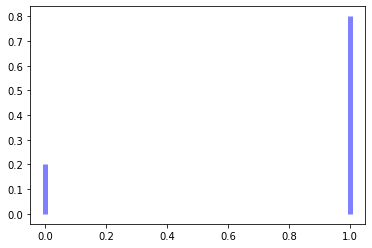

In [48]:
plt.vlines(0, 0, stats.bernoulli.pmf(0, p), colors='b', lw=5, alpha=0.5)
plt.vlines(1, 0, stats.bernoulli.pmf(0, 1-p), colors='b', lw=5, alpha=0.5)
plt.savefig('results/plot5.png')

In [ ]:
### GRADED

### YOUR SOLUTION HERE


###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As you can see, the Bernoulli distribution is a straight distribution plotting the probability of two discrete outcomes. On the x-axis, you will always have two points on 0 and 1. The height on the y-axis will represent the probability of each outcome.

<a id = "binomial"></a>
### Binomial Distribution  

A **binomial distribution** is the distribution found from repeating a Bernoulli trial with a $p$ chance of success $n$ times. 

For example, if you flip a coin once, you can assume there is a probability of 50% that you will land on heads. If you were to run an experiment where you create 100 "trials" -- each time in which, you flip a coin 8 times, you can plot the number of heads in each of the 100 trials in a _binomial distribution_.

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*5 points*

Given our p-value from above of .8, and an n- parameter of 100, what is the expected mean of the binomial distribution? Assign your answer as a float to `ans7` below.

**Hint:** Use the `scipy` function `stats.binom.mean`.

In [56]:
stats.binom.mean(100, .8)

80.0

In [58]:
### GRADED

### YOUR SOLUTION HERE
ans6 = stats.binom.mean(100, .8)

###
### YOUR CODE HERE
###


In [59]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, let's simulate a binomial distribution using Python.

The cell below performs the following tasks:
- Create an empty list called `bin_sample` to store values
- Start a `for` loop that performs the following actions 10,000 times:
  - Draw 100 samples from the `sales` column
  - Count the number of sales which are greater than $250 (breaking even)
  - Add the count to the `bin_sample` list

In [60]:
%%time
# Create an empty list for storing observations
bin_sample = []

# Run code 10000 times
for i in range(10000):
    # Take 100 samples from "sales"
    sample = np.random.choice(office['sales'], size = 100, replace = True)
    
    # Only keep observations greater than 250
    break_even = [s for s in sample if s >=250]
    
    # Count remaining observations
    bin_sample.append(len(break_even))

CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.47 s


Now, we have a list of 10,000 samples indicating the total count of sales that were over $250. Let's plot this list to see the shape of the distributions.

We're going to create two overlapping bar graphs. First, in blue, we will plot our observed binomial distribution taken from the `bin_sample` list we just generated. Second, in red, we will plot the **probability mass function** of a binomial distribution given a probability of 0.8, n=100, and 10,000 trials to simulate the expected outcome of our trials above. Let's compare the two.

In [61]:
# Count the number of trials by # of successes
bin_sample_counts = pd.Series(bin_sample).value_counts()

# Examine the grouped data
bin_sample_counts.head()

81    1015
80     974
82     943
79     917
83     837
dtype: int64

You can see that the most frequent number of successes is roughly 80, reflecting the 80% probability of breaking even. Let's create our simulated binomial data using the `stats.binom.pmf()` function.

In [62]:
# Create the binomial data in the same format as our observed data
binom_pmf = {}
for i in range(60,96):
    binom_pmf[i] = stats.binom.pmf(i,100,len(sales[sales>=250])/len(sales),)*10000
    
# Convert from a dictionary to a pandas series
binom_pmf_ser=pd.Series(binom_pmf)

# Examine the binomial data
binom_pmf_ser.head()

60    0.012283
61    0.033244
62    0.086308
63    0.214860
64    0.512675
dtype: float64

[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*10 points*

We now have our two overlapping series to plot and compare. The `binom_pmf_ser` represents what the distribution _should_ look like based on the probability value and the `bin_sample_counts` represents the actual binomial distribution of sales values for comparison.

The `python` code to create a bar plot of the actual binomial distribution is given by:

```python
plt.bar(bin_sample_counts.index, bin_sample_counts, color = "blue", alpha = .4)
```
    
Using the example above, create a plot that contains the actual binomial distribution *and* a second bar graph of the binomial series. Set the color in the second bar plot equal to `red`. Do not change any parameter. Save your plot as a png with the name "plot8.png" in the folder "results".


# plot the pmf and the sample counts

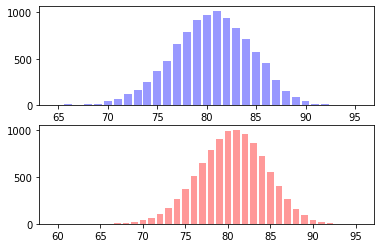

In [97]:
### GRADED

### YOUR SOLUTION HERE




# plt.show()
# plot1 = plt.figure(1)
# plt.bar(bin_sample_counts.index, bin_sample_counts, color = "blue", alpha = .4)
# plot2 = plt.figure(2)
# plt.bar(binom_pmf_ser.index, binom_pmf_ser, color = "red", alpha = .4)
# plt.savefig('results/plot8.png')

plt.subplot(2, 1, 1)
plt.bar(bin_sample_counts.index, bin_sample_counts, color = "blue", alpha = .4)
plt.subplot(2, 1, 2)
plt.bar(binom_pmf_ser.index, binom_pmf_ser, color = "red", alpha = .4)
plt.savefig('results/plot8.png')


###
### YOUR CODE HERE
###


In [100]:
binom_pmf_ser

60       0.012283
61       0.033244
62       0.086308
63       0.214860
64       0.512675
65       1.171912
66       2.564973
67       5.372183
68      10.760182
69      20.596067
70      37.645385
71      65.650563
72     109.135930
73     172.769362
74     260.173210
75     372.253218
76     505.392368
77     650.149148
78     791.243277
79     909.430310
80     985.286504
81    1004.086927
82     960.229099
83     859.474661
84     717.904234
85     557.739462
86     401.502250
87     266.661654
88     162.586713
89      90.477396
90      45.640886
91      20.700292
92       8.357857
93       2.967330
94       0.912010
95       0.237734
dtype: float64

In [101]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As you can see, the distributions are nearly identical. Binomial distributions are often used in data science questions related to probabilities. If you're answering questions about the probability of a binary outcome (i.e., will a customer make a purchase?), you can use the probability calculated from a large data set to draw samples and plot the probability of a range of outcomes over future trials.

[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*5 points*

Given a binomial distribution with n = 100 and p = .80, what is the variance of the distribution? Assign your result as a float to `ans9` below.

In [102]:
### GRADED
n = 100
p = .8

### YOUR SOLUTION HERE
ans8 = stats.binom.var(100, .8)

###
### YOUR CODE HERE
###


In [103]:
ans8

15.999999999999996

In [104]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "poisson"></a>
### Poisson Distribution

The **Poisson distribution** describes a set of discrete occurrences from a _Poisson experiment_. It characterizes the probability of a _count_ of events occurring (i.e., the number of patients in an emergency room per day) using the following formula:

$$P(x; μ) = (e^{-μ}) (μ^x) / x!$$

This equation reads, that the probability of $x$, given a mean $\mu$, can be defined by the equation on the right. Here _e_ is a constant approximately equal to _2.71828_. 

Given our example of patients in an emergency room, we can estimate the probability of _x_ number of patients in the emergency room in a day given $\mu$, (the average number of daily patients in the emergency room). 

#### Probability of a specific count value
Let's return to our sales data. We have a column, `transactions`, that contains a count of the number of items per sale. Calculate the mean number of transactions per sale below.

In [105]:
office['transactions'].mean()

13.591074622363006

We know that there are an average of approximately 13.59 transactions in a given sale. What is the probability that there are 15 transactions in our next sale? 

Let's solve the equation using Python. We can assign the correct values to `x`, `mu`, and `e` below.

In [113]:
x = 15
mu = office['transactions'].mean()

e = np.exp(1) # e, Euler's number 2.718...

Next, let's solve our equation using all 3 values we just assigned to `x`, `mu`, and `e`. You can solve for the denominator $x!$ (x-factorial) using `factorial` from the `math` package.

In [114]:
import math
prob = (e**(-mu))*(mu**x)/math.factorial(x)

print(prob)

0.09545059327679627


Thus, based on the Poisson distribution, we can estimate that there is a 9.5% probability that our next sale will have 15 transactions.

#### How does this work?

Let's simulate a Poisson distribution below using the `poisson` function in `scipy.stats`. This allows you to generate a Poisson distribution with a specified mean.

In [115]:
# Problem below
x = 8
mu = 6
e = np.exp(1) # e, Euler's number 2.718...

prob = (e**(-mu))*(mu**x)/math.factorial(x)

print(prob)

0.10325773353084435


In [116]:
from scipy.stats import poisson

# Create an empty array
arr = []

# Create a Poisson object
rv = poisson(office['transactions'].mean())

# Assign the probability value of each count to arr
for num in range(0,30):
 arr.append(rv.pmf(num))

print(arr)

[1.251616524719395e-06, 1.701081358604397e-05, 0.0001155976184175149, 0.000523698619359963, 0.0017794067538374355, 0.00483680999498827, 0.010956240929346113, 0.0212724411501901, 0.03613941688400742, 0.05457483463102573, 0.07417306499733914, 0.09164469648620137, 0.1037958257239813, 0.10851513945418557, 0.1053455255698543, 0.09545059327679604, 0.08107975849835979, 0.06482123812437535, 0.04894390469235281, 0.035010540051767874, 0.023791543120640333, 0.015397744663513723, 0.0095123589426321, 0.005621007835826741, 0.0031831473729003667, 0.001730495739162698, 0.0009045883355631325, 0.00045534546559843634, 0.0002210226500679608, 0.00010358397690710777]


The array printed above contains the probability of getting a transaction value between 0 and 30 based on the mean number of transactions (13.59). The probability value is calculated using the formula above, the **probability mass function**. 

Let's plot this array in a **Poisson distribution**, adding a marker for our earlier count of 15 transactions.

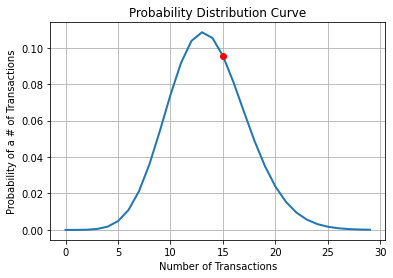

In [117]:
# Plot the array
plt.grid(True)
plt.plot(arr, linewidth=2.0)

# Add a marker for transactions = 15
prob = rv.pmf(15)
plt.plot([15], [prob], marker='o', markersize=6, color="red")

# Add labels and title
plt.ylabel('Probability of a # of Transactions')
plt.xlabel('Number of Transactions')
plt.title('Probability Distribution Curve')
plt.show()

The above distribution confirms that there is an approximately 9.5% probability that our next sale contains 15 transactions.

[Back to top](#Index:) 
<a id='q09'></a>

### Question 09:

*5 points*


A real estate company sells an average of 6 homes per week. What is the probability that they will sell 8 homes next week? Assign your answer as a float value to `ans9` below.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans9 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*5 points*

Which of the following sets of data can you use with a Poisson distribution?

- a) The number of infants at each height and weight category
- b) The number of tickets issued by the police department per day
- c) The average daily tickets per police officer per day
- d) The number of tests run per visit to a pediatrician's office

Assign the letter associated with your choice as a string to `ans10` below.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans10 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "geometric"></a>
### Geometric Distribution
A **geometric distribution** describes the number of trials needed for the **FIRST** success of an outcome.

- Discrete distribution
- Only 1 parameter: $p$
- Expected value: $1/p$
- Variance: $(1-p)/p^2$


For example, let's extend the example found near the end of lecture 5-10, with a basketball player whose chances of making a free-throw are 60% ($p = .6$)  

#### Probability of making the first shot  

If a player makes the first shot, there is only one Bernoulli trial. What is the probability that was a success?  

The probability of one success is .6, thus that is the probability of making the first shot.  

#### Probability of making the second shot

If the player makes the second shot, there are two Bernoulli trials, a failure then a success.  

The probability of the first failure is $1-p$ or .4.  Probability of the success on the second shot is $p$ or .6.  

Thus the probability of making the second attempt is $(1-p)p = .4*.6 = .24$  

#### Probability of making the 5th shot

When a player makes the fifth shot, there are five Bernoulli trials, four failures then a success.  

The probability of all the failures is $1-p$ or .4.  Probability of the success on the fifth shot is $p$ or .6.  

Thus the probability of making the shot on the fifth attempt is $(1-p)^4p = .4^4*.6 = .1536$  

[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*5 points*

Given our probability of success of .8, what is the likelihood of a success on EITHER the first or second trial?

Assign your answer as a float value between 0 and 1 to `ans11`.

In [ ]:
### GRADED
p = 0.8

### YOUR SOLUTION HERE
ans11 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q12'></a>

### Question 12:

*5 points*

Given our probability of breaking even at .8, what is the expected value of a geometric distribution? (i.e., how many times will you need to draw a random value from the data set before you receive a sales value above $250?) Assign a number, float or int, to `ans12`.

In [ ]:
### GRADED
p = 0.8

### YOUR SOLUTION HERE
ans12 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Once again, let's simulate our distribution with 10,000 trials. We'll be using the `np.random.permutation` function from the `numpy` package in order to randomly draw values from our data set. We will keep drawing values from the `sales` column until we receive a value above $250, and then record the number of trials that were necessary before retrieving the value.

Using a `for` loop with a `while` loop nested inside, we will do the following:
1. Randomly order the sales column
2. Starting from item 1, see how long it takes to find a sales value greater than 250.
3. Add that (one-based) index to a list

**Please note:** this will take at least 10 seconds to finish running.

In [ ]:
%%time
# Create an empty list to add data from for loop
geom_trials = []

for i in range(10000):
    
    # Permute the sales data
    perm = np.random.permutation(sales)
    attempt = 1 # One based indexing
    
    # Find first sales greater than 250
    while perm[attempt-1] <=250:
        attempt +=1
    
    # append index
    geom_trials.append(attempt)

Now let's summarize and plot the number of trials that were necessary to retrieve a sales record above $250.

In [ ]:
trial_num = pd.Series(geom_trials).value_counts()
print(trial_num)
plt.bar(trial_num.index, trial_num);

As you probably expected, around 80% of the time (8,000 of 10,000 trials), the first observation included sales above the break-even threshold.  

However, there were a few trials where it took 3 or more times before retrieving a value above $250. There was even one trial where we had to keep drawing a random value 7 times!  

[Back to top](#Index:) 
<a id='q13'></a>

### Question 13:

*5 points*

Given the parameter p = .8, calculate the probability of seeing the first success at trial 5 or later.

**Hint:**
The probability the first success does not occur in the first trial is:
1 - p = 1- .8 = .2
The probability the first success does not occur in the first OR second trial is:
1-(p+p(1-p)) = 1-(.8+.8*.2) = 1-.96 = .04

Assign your result as a float to `ans13`.

In [ ]:
### GRADED
p = 0.8
n = 5

### YOUR SOLUTION HERE
ans13 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "exponential"></a>
### Exponential Distribution

The final distribution covered in this assignment is the Exponential Distribution.  
The **Exponential Distribution** models continous random variables, for example, arrival times and rates. For example, it can be used to measure the time until a person arrives at a restaurant or the time until a component breaks down.

- One parameter: lambda -- $\lambda$
- Expected value: $1/\lambda$
- Standard deviation: $1/\lambda$ (note this is the same as the expected value)
- Variance: $1/\lambda^2$


As a note, the Geometric Distribution is the discrete version of Exponential -- if the Bernoulli trials in the Geometric Distribution were occuring in continuous time, they would instead use the Exponential Distribution.


Let's assume that our office supply company receives an order, **on average** every 4 hours. We should also assume the time between orders is distributed exponentially.

This means our expected value is 4. We also know that the expected value is equal to $1/\lambda$. Thus: 

$$4 = 1/\lambda \rightarrow \lambda = 1/4$$

[Back to top](#Index:) 
<a id='q14'></a>

### Question 14:

*5 points*

If the lambda parameter of an exponential distribution is equal to 1/4, what is the standard deviation of that exponential distribution?

Assign your result as an int or float value to `ans14`.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans14 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q15'></a>

### Question 15:

*5 points*

If the lambda parameter of an exponential distribution is equal to 1/4, what is the variance of that exponential distribution?

Assign your result as an int or float value to `ans15`.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans15 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
